In [14]:


import numpy.linalg as LA
import matplotlib.pyplot as plt
from my_pickle import my_pickle_load, my_pickle_dump

%matplotlib inline

In [15]:
import cPickle as pickle
import pandas as pd
import numpy as np
#from textblob import TextBlob

#from bs4 import BeautifulSoup
#from sklearn.naive_bayes import MultinomialNB

`

In [16]:
def my_pickle_dump(fname, data):
    with open(fname, 'w') as f:
        pickle.dump(data, f)

def my_pickle_load(fname):
    with open(fname) as f:
        return pickle.load(f)

In [17]:
df = pd.read_csv('../data/nutch-crawl-huizhou-only2-01-15-2017-cleaned.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62061 entries, 0 to 62060
Data columns (total 7 columns):
id         62061 non-null object
tstamp     62061 non-null object
url        62061 non-null object
domain     62061 non-null object
title      61836 non-null object
digest     62061 non-null object
content    62061 non-null object
dtypes: object(7)
memory usage: 3.8+ MB


In [19]:
df['doc_len'] = df['content'].str.len()

In [20]:
df['doc_len'].max()

74764

In [21]:
df_2000 = df[df['doc_len'] < 2000]

In [22]:
df['bucket'] = pd.cut(df.doc_len, 40)

In [24]:
newdf = df[['bucket','doc_len']].groupby('bucket').count()

In [25]:
newdf.head(100)

,doc_len
bucket,
"(-72.762, 1871.05]",7365
"(1871.05, 3740.1]",11045
"(3740.1, 5609.15]",18427
"(5609.15, 7478.2]",13094
"(7478.2, 9347.25]",6040
"(9347.25, 11216.3]",2554
"(11216.3, 13085.35]",1451
"(13085.35, 14954.4]",813
"(14954.4, 16823.45]",417


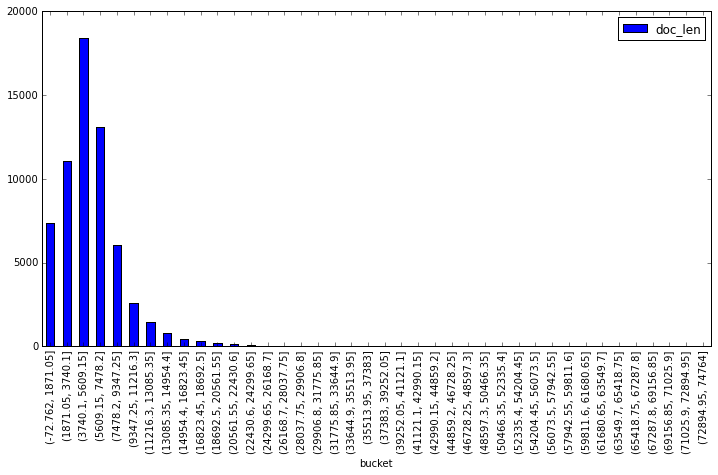

In [26]:
newdf.plot(kind='bar', figsize=(12, 6))

/Users/nanfanghu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


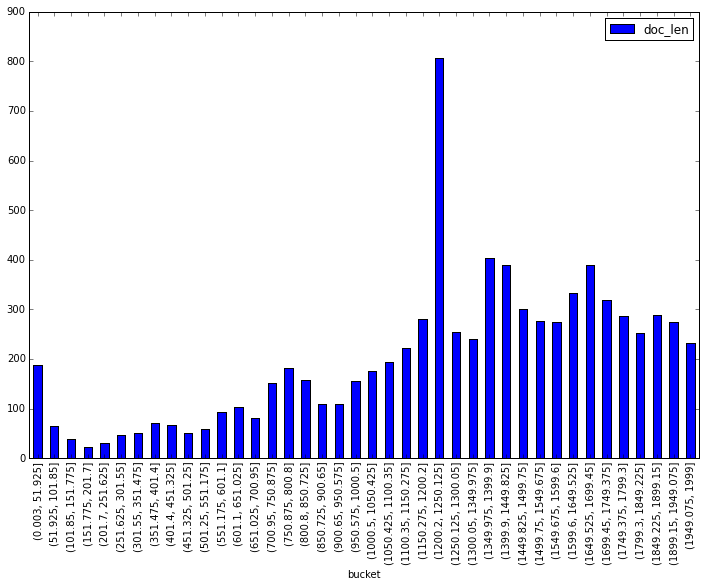

In [27]:
df_2000['bucket'] = pd.cut(df_2000.doc_len, 40)
newdf_2000 = df_2000[['bucket','doc_len']].groupby('bucket').count()
newdf_2000.plot(kind='bar', figsize=(12, 8))

/Users/nanfanghu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


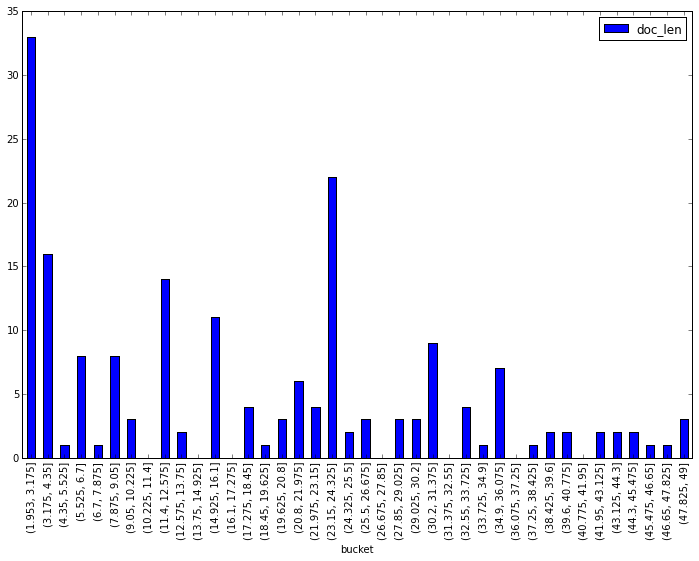

In [28]:
df_50 = df[df['doc_len'] < 50]
df_50['bucket'] = pd.cut(df_50.doc_len, 40)
newdf_50 = df_50[['bucket','doc_len']].groupby('bucket').count()
newdf_50.plot(kind='bar', figsize=(12, 8))

In [29]:
df_dropped = df[df['doc_len'] > 100]

In [30]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61809 entries, 0 to 62060
Data columns (total 9 columns):
id         61809 non-null object
tstamp     61809 non-null object
url        61809 non-null object
domain     61809 non-null object
title      61638 non-null object
digest     61809 non-null object
content    61809 non-null object
doc_len    61809 non-null int64
bucket     61809 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 4.3+ MB


In [31]:
df_no_dup = df_dropped.drop_duplicates(['title'])

In [32]:
df_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54952 entries, 0 to 62059
Data columns (total 9 columns):
id         54952 non-null object
tstamp     54952 non-null object
url        54952 non-null object
domain     54952 non-null object
title      54951 non-null object
digest     54952 non-null object
content    54952 non-null object
doc_len    54952 non-null int64
bucket     54952 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 3.8+ MB


In [33]:
df_no_dup = df_no_dup.dropna(subset =['content'])

In [34]:
df_final = df_no_dup[['tstamp', 'domain', 'url', 'content', 'title', 'doc_len']]

In [35]:
df_final.head()

,tstamp,domain,url,content,title,doc_len
0,2017-01-15T16:23:45.703Z,99huizhou.com,http://www.99huizhou.com/thread-102832-1-1.html,【视频】白岳笔会之座谈会-白岳笔会-故园徽州网 - Powered by Discuz! 故...,【视频】白岳笔会之座谈会-白岳笔会-故园徽州网 - Powered by Discuz!,3936
2,2017-01-15T17:09:56.419Z,99huizhou.com,http://www.99huizhou.com/thread-108113-1-1.html,这个怎么用？ - 徽州摄影旅游群 - 故园徽州 - Powered by Discuz! 故...,这个怎么用？ - 徽州摄影旅游群 - 故园徽州 - Powered by Discuz!,3585
3,2017-01-15T19:00:55.159Z,99huizhou.com,http://www.99huizhou.com/thread-110501-1-1.html,黄山日报：石潭摄影基地建设快速推进 - 徽州摄影旅游群 - 故园徽州 - Powered b...,黄山日报：石潭摄影基地建设快速推进 - 徽州摄影旅游群 - 故园徽州 - Powered b...,6176
4,2017-01-15T16:19:47.112Z,99huizhou.com,http://www.99huizhou.com/thread-117056-1-1.html,故园徽州9月9日签到记录贴-说鳖茶馆-故园徽州网 - Powered by Discuz! ...,故园徽州9月9日签到记录贴-说鳖茶馆-故园徽州网 - Powered by Discuz!,4597
5,2017-01-15T16:46:54.575Z,99huizhou.com,http://www.99huizhou.com/thread-136351-2-1.html,找家谱 方姓的族人来帮忙-徽州姓氏-故园徽州网 - Powered by Discuz! 故...,找家谱 方姓的族人来帮忙-徽州姓氏-故园徽州网 - Powered by Discuz!,21776


In [36]:
articles = df_final['content'].str.decode('utf-8')
titles = df_final['title'].str.decode('utf-8')

In [37]:
idx = 0
for title in titles:
    if idx < 10:
        print 'title----', idx
        print title
        idx +=1
    

title---- 0
【视频】白岳笔会之座谈会-白岳笔会-故园徽州网 - Powered by Discuz!
title---- 1
这个怎么用？ - 徽州摄影旅游群 - 故园徽州 - Powered by Discuz!
title---- 2
黄山日报：石潭摄影基地建设快速推进 - 徽州摄影旅游群 - 故园徽州 - Powered by Discuz!
title---- 3
故园徽州9月9日签到记录贴-说鳖茶馆-故园徽州网 - Powered by Discuz!
title---- 4
找家谱 方姓的族人来帮忙-徽州姓氏-故园徽州网 - Powered by Discuz!
title---- 5
踩点万安罗经博物馆-万安吴鲁衡罗盘-故园徽州网 - Powered by Discuz!
title---- 6
《中国民间徽商研究小组章程》-民间徽商研究小组-故园徽州网 - Powered by Discuz!
title---- 7
清朝嘉道年间黟北卢氏茶商家书-民间徽商研究小组-故园徽州网 - Powered by Discuz!
title---- 8
徽州婺源虹关詹氏墨商信札一通-民间徽商研究小组-故园徽州网 - Powered by Discuz!
title---- 9
歙县旅沪同乡会会章-民间徽商研究小组-故园徽州网 - Powered by Discuz!


In [38]:
idx = 0
for article in articles:
    if idx < 10:
        print 'article----', idx
        print article
        idx +=1
    

article---- 0
【视频】白岳笔会之座谈会-白岳笔会-故园徽州网 - Powered by Discuz! 故园徽州网 | 徽州地区最大的门户网站 | 切换到宽版 登录 注册会员 找回密码 用其他账号登陆 导航 切换风格 传统模式 轻论坛 用QQ账号登陆 搜索 搜索 本版 文章 帖子 用户 论坛首页 Portal 社区导航 BBS 活动报名 随便逛逛 最新图文集合 我的家园 Space 游戏娱乐 Manyou 每日签到 简易版论坛 导读 广播 淘帖 群组 每日签到 排行 日志 相册 分享 记录 资讯 热点 故园时评 倾城之爱 媒体互动 寻徽之旅 说鳖茶馆 协会专区 生活 徽州美食 摄影天地 旅游户外 育才徽塾 天都文社 新安书画 文化 人文徽州 寻根徽州 生态保护 徽州收藏 振兴徽州 徽州村落 故园徽州 » 社区导航 › 故园生活区 › 天都文社 › 白岳笔会 › 【视频】白岳笔会之座谈会 向前 【直播】2017点亮徽州-西街文化之夜新春盛 重归老巢 故园年会日上菖蒲 每天一对联 每日一菖蒲 这画不错 归于朴 需要工作的朋友 快来哦 ........ 甘为孺子牛 孺子牛 荷花 不容易 向后 01-15 故园徽州1月15日签到记录贴 01-15 【直播】2017点亮徽州-西街文化之夜新春盛 01-15 重归老巢 01-15 故园年会日上菖蒲 01-15 每天一对联 01-15 每日一菖蒲 1 2 3 / 3 页 下一页 返回列表 查看: 1923 | 回复: 24 【视频】白岳笔会之座谈会 [复制链接] 丑禅 丑禅 当前离线 积分 21148 窥视卡 雷达卡 签到天数: 7 天 [LV.3]偶尔看看II 电梯直达 楼主 发表于 2012-4-28 17:16:18 | 只看该作者 | 倒序浏览 | 阅读模式 马上注册成为会员，享用更多功能，让你轻松玩转徽州 您需要 登录 才可以下载或查看，没有帐号？ 注册会员 x 2012年 故园 徽州 天都文社白岳笔会在齐云山举行座谈会，这是座谈会上发言视频之一 座谈会上发言视频之二 座谈会上发言视频之三 座谈会上发言视频之四。撒版主作总结，没想到溪溪又替他作了最后总结 分享到:  QQ好友和群 QQ空间 腾讯微博 腾讯朋友 微信 收藏 0 转播 分享 淘帖 0 支持 0 反对 0 回复 使用道具 举报 提升卡 置顶卡 沉

tot_articles = [article for article in articles[100:800]]
print len(tot_articles)

In [1]:
from nltk.tokenize.stanford_segmenter import StanfordSegmenter
from collections import Counter

ImportError: No module named stanford_segmenter

In [22]:
stanford_root_dir = '/users/nanfanghu/desktop/nltk/stanford-segmenter-2014-08-27/'

In [23]:
segmenter = StanfordSegmenter(path_to_jar= stanford_root_dir + 'stanford-segmenter-3.4.1.jar', 
                              path_to_slf4j= stanford_root_dir + 'slf4j-api.jar',
                              path_to_sihan_corpora_dict= stanford_root_dir + 'data', 
                              path_to_model= stanford_root_dir + 'data/pku.gz', 
                              path_to_dict= stanford_root_dir + 'data/dict-chris6.ser.gz')

In [ ]:
result = segmenter.segment(tot_articles)

In [25]:
import datetime
print datetime.datetime.now()

2017-01-17 15:59:42.283295


In [ ]:
my_pickle_dump('../pkl/solr_result.pkl', result)

In [26]:
print len(result)

338044


In [27]:
res = result.split(' ')
print result[:400]

我 只 爱 故园 ， 无关 促进会 ！ - 协会 专区 - 故园 徽州 网 - Powered by Discuz ! 故园 徽州 网 | 徽州 地区 最 大 的 门户 网站 |切 换 到 宽 版 登


In [41]:
Baidu_CH_Stopwords_list = ['按, 按照, 俺, 俺们, 阿', 
                      '别, 别人, 别处, 别是, 别的, 别管, 别说, 不, 不仅 ,不但, 不光, 不单, 不只, 不外乎, 不如, 不妨, 不尽, 不尽然, 不得, 不怕, 不惟, 不成, 不拘, 不料, 不是, 不比, 不然, 不特, 不独, 不管, 不至于, 不若, 不论, 不过, 不问, 比方, 比如, 比及, 比, 本身, 本着, 本地, 本人, 本, 巴巴, 巴, 并, 并且, 非彼, 彼时, 彼此, 便于, 把, 边, 鄙人, 罢了, 被, 般的',
                     '此间,此次,此时,此外,此处,此地,此,才,才能,朝,朝着,从,从此,从而,除非,除此之外,除开,除外,除了,除,诚然,诚如,出来,出于,曾,趁着,趁,处在,乘,冲',
                     '等等,等到,等,第,当着,当然,当地,当,多,多么,多少,对,对于,对待,对方,对比,得,得了,打,打从,的,的确,的话,但,但凡,但是,大家,大,地,待,都,到,叮咚',
                     '而言,而是,而已,而外,而后,而况,而且,而,尔尔,尔后,尔,二来',
                     '非独,非特,非徒,非但,否则,反过来说,反过来,反而,反之,分别,凡是,凡',
                     '个,个别,固然,故,故此,故而,果然,果真,各,各个,各位,各种,各自,关于具体地说,归齐,归,根据,管,赶,跟,过,该,给,光是',
                     '或者,或曰,或是,或则,或,何,何以,何况,何处,何时,还要,还有,还是,还,后者,很,换言之,换句话说,好,后,和',
                     '即,即令,即使,即便,即如,即或,即若,继而,继后,继之,既然,既是,既往,既,尽管如此,尽管,尽,就要,就算,就是说,就是了,就是,就,据,据此,接着,经,经过,结果,及,及其,及至,加以,加之,例如,介于,几时,几,截至,极了,简言之,竟而,紧接着,距,较之,较,进而,鉴于,基于,具体说来,兼之,借傥然,今,叫,将',
                     '可,可以,可是,可见,开始,开外,况且,靠,看',
                     '来说,来自,来着,来,两者,临,类如,论,赖以,连,连同,离',
                     '莫若,莫如,莫不然,假使,假如,假若,某,某个,某些,某某,漫说,没奈何,每当,每,慢说,冒',
                     '哪个,哪些,哪儿,哪天,哪年,哪怕,哪样,哪边,哪里,那里,那边,那般,那样,那时,那儿,那会儿,那些,那么样,那么些,那么,那个,那,乃,乃至,乃至于,宁肯,宁愿,宁可,宁,能,能否,你,你们,您,拿,难道说,内,哪',
                     '凭借,凭,旁人,譬如, 譬喻',
                     '且,且不说,且说,其,其一,其中,其二,其他,其余,其它,其次,前后,前此,前者,起见,起,全部,全体,恰恰相反,岂但,却,去',
                     '若非,若果,若是,若夫,若,另,另一方面,另外,另悉,如若,如此,如果,如是,如同,如其,如何,如下,如上所述,如上,如,然则,然后,然而,任,任何,任凭,仍,仍旧,人家,人们,人,让',
                     '甚至于,甚至,甚而,甚或,甚么,甚且,什么,什么样,上,上下,虽说,虽然,虽则,虽,孰知,孰料,始而,所,所以,所在,所幸,所有,是,是以,是的,设使,设或,设若,谁,谁人,谁料,谁知,随着,随时,随后,随,顺着,顺,受到,使得,使,似的,尚且,庶几,庶乎,时候,省得,说来,首先',
                     '倘,倘使,倘或,倘然,倘若,同,同时,他,他人,他们们,她们,她,它们,它,替代,替,通过,腾', 
                     '这里,这边,这般,这次,这样,这时,这就是说,这儿,这会儿,这些,这么点儿,这么样,这么些,这么,这个,这一来,这,正是,正巧,正如,正值',
                     '万一,为,为了,为什么,为何,为止,为此,为着,无论,无宁,无,我们,我,往,望,惟其,唯有',
                     '下,向着,向使,向,先不先,相对而言,许多,像,小,些',
                     '一,一些,一何,一切,一则,一方面,一旦,一来,一样,一般,一转眼,,由此可见,由此,由是,由于,由,用来,因而,因着,因此,因了,因为,因,要是,要么,要不然,要不是,要不,要,与,与其,与其说,与否,与此同时,以,以上,以为,以便,以免,以及,以故,以期,以来,以至,以至于,以致,己,已,已矣,有,有些,有关,有及,有时,有的,沿,沿着,于,于是,于是乎,云云,云尔,依照,依据,依,余外,也罢,也好,也,又及,又,抑或,犹自,犹且,用,越是',
                     '只当,只怕,只是,只有,只消,只要,只限,再,再其次,再则,再有,再者,再者说,再说,自身,自打,自己,自家,自后,自各儿,自从,自个儿,自,怎样,怎奈,怎么样,怎么办,怎么,怎,至若,至今,至于,至,纵然,纵使,纵令,纵,之,之一,之所以,之类,着呢,着,眨眼,总而言之,总的说来,总的来说,总的来看,总之,在于,在下,在,诸,诸位,诸如,咱们,咱,作为,只,最,照着,照,直到,综上所述,贼死,逐步,遵照,遵循,针对,致,者,则甚,则',
                     '咳,哇,哈,哈哈,哉,哎,哎呀,哎哟,哗,哟,哦,哩,矣哉,矣乎,矣,焉,毋宁,欤,嘿嘿,嘿,嘻,嘛,嘘,嘎登,嘎,嗳,嗯,嗬,嗡嗡,嗡,喽,喔唷,喏,喂,啷当,啪达,啦,啥,啐,啊,唉,哼唷,哼,咧,咦,咚,咋,呼哧,呸,呵呵,呵,呢,呜呼,呜,呗,呕,呃,呀,吱,吧哒,吧,吗,吓,兮,儿,亦,了,乎']

In [42]:
Chinese_Symbols = [u'\uff0c', u'\u3002', u'\u201c' u'\u201d', u'\u3001', u'\u300b', u'\u300a', u'\uff1a', u'\uff1b',
                  u')', u'(', u'\uff09', u'\uff08']


In [43]:
def is_not_chinese_symbol(token):
    if token == u'\u201c' or token == u'\u201d':
        return False
    elif token == u'\uff0c' or token == u'\u3002':
        return False
    elif token == u'\u3001' or token == u'\u300b':
        return False
    elif token == u'\u300a' or token == u'\uff1a':
        return False
    elif token == u'\uff1b' or token == u'\uff09':
        return False
    elif token == u')' or token == u'(':
        return False
    elif token == u'\uff08' or token == u'\u4e00':
        return False
    elif token == u'-' or token == u':':
        return False
    elif token == u'\u548c' or  token == u'>': 
        return False
    elif token == u'\xb7' or  token == u'\u2014\u2014':         
        return False


    return True

In [49]:
combined_str = ''.decode('utf-8')
for words in Baidu_CH_Stopwords_list:
    combined_str = combined_str + words.decode('utf-8') 

In [45]:
combined_str = [words for words in Baidu_CH_Stopwords_list]

In [50]:
combined_str = combined_str + words.decode('utf-8') 

In [53]:
print len(combined_str)

2211


In [51]:
Baidu_CH_Stopwords = combined_str.split(',')

In [64]:
tokens_no_stopwords = [token for token in res if token not in Baidu_CH_Stopwords and is_not_chinese_symbol(token)] 

In [51]:
my_pickle_dump('solr_tokens_no_stopwords.pkl', tokens_no_stopwords)

In [65]:
count = Counter(tokens_no_stopwords)

In [66]:
most_common_words = count.most_common(50)

In [67]:
print most_common_words

[(u'\u6587\u5316', 752), (u'\u5386\u53f2', 646), (u'\u5e74', 601), (u'\u8336', 530), (u'\u5b89\u5fbd', 491), (u'\u540d\u4eba', 478), (u'\u65c5\u6e38', 388), (u'\u5fbd\u5dde', 383), (u'\u53bf', 373), (u'\u4e0d', 370), (u'\u72b6\u5143', 321), (u'\u51fa', 291), (u'\u7f51\u7ad9', 289), (u'\u4e13\u680f', 276), (u'\u5fbd', 265), (u'\u4e09', 242), (u'\u4e2d', 239), (u'\u4e13\u9898', 225), (u'\u9891\u9053', 222), (u'\u63a8\u8350', 221), (u'\u4e2d\u56fd', 220), (u'\u53d1\u5c55', 208), (u'\u7b2c\u4e00', 203), (u'\u8bf4', 201), (u'\u5730\u65b9', 201), (u'\u8336\u6587\u5316', 200), (u'\u4e0b', 199), (u'\u5de2\u6e56', 195), (u'\u4e2d\u5fc3', 195), (u'\u4e94\u6cb3', 190), (u'\u540d', 187), (u'\u4e2a', 182), (u'\u5b89\u5e86', 179), (u'\u5361', 177), (u'\u4f5c\u8005', 174), (u'\u7814\u7a76', 172), (u'\u2014', 171), (u'\u5927\u4e8b\u8bb0', 170), (u'\u5185\u5bb9', 170), (u'\u9547', 169), (u'\u5c71', 165), (u'\u76f8\u5173', 164), (u'\u4f11\u5b81', 163), (u'\u4eba\u7269', 162), (u'\u65f6', 159), (u'\u5f53

In [68]:
for word in most_common_words:
    print word[0], word[1]

文化 752
历史 646
年 601
茶 530
安徽 491
名人 478
旅游 388
徽州 383
县 373
不 370
状元 321
出 291
网站 289
专栏 276
徽 265
三 242
中 239
专题 225
频道 222
推荐 221
中国 220
发展 208
第一 203
说 201
地方 201
茶文化 200
下 199
巢湖 195
中心 195
五河 190
名 187
个 182
安庆 179
卡 177
作者 174
研究 172
— 171
大事记 170
内容 170
镇 169
山 165
相关 164
休宁 163
人物 162
时 159
当前 156
名茶 156
十 155
戏曲 151
篇 150


In [ ]:
end -----------

In [21]:
titles = df_final['title']

In [22]:
articles.shape

(61809,)

In [23]:
#articles_2000 = articles[:2000]

In [24]:
#articles_2000.shape

In [41]:
def get_tokens(doc):
    lowers = doc.lower()
    #no_punctuation = lowers.translate(None, string.punctuation)

    #remove the punctuation using the character deletion step of translate
    no_punctuation = lowers.translate(None, string.punctuation)
    no_punctuation_decode = no_punctuation.decode('ascii', errors='ignore')

    tokens = nltk.word_tokenize(no_punctuation_decode)
    
    filtered = [w for w in tokens if not w in stopwords.words('english') and len(w) > 1]
    
    #tokens_no_stopwords = [token for token in tokens if token not in stopwords.word('english')] 
    #return tokens_no_stopwords
    
#    print (len(filtered))
    
    return filtered

In [42]:
tot_tokens = [get_tokens(article) for article in articles]
print len(tot_tokens)

TypeError: translate() takes exactly one argument (2 given)

In [28]:
my_pickle_dump('solr_tot_tokens.pkl', tot_tokens)

In [29]:
flatten = [ inner for sublist in tot_tokens for inner in sublist ]

In [30]:
my_pickle_dump('solr_tot_flatten.pkl', flatten)

In [30]:
# with open('solr_flatten.txt', 'w') as f:
#     f.write(str(flatten))

In [31]:
# flatten_ascii = flatten.encode('ascii', igore)

In [3]:
flatten = my_pickle_load('solr_tot_flatten.pkl')

In [31]:
count = Counter(flatten)

In [32]:
most_common_words = count.most_common(50)
print most_common_words

[(u'10', 33393), (u'1208228', 31707), (u'b220080023', 30086), (u'2016', 26701), (u'100', 23020), (u'24', 17858), (u'2017', 16507), (u'copyright', 16494), (u'div', 16387), (u'11', 14294), (u'dedecms', 14165), (u'12', 11846), (u'qq', 11201), (u'rights', 10358), (u'span', 10203), (u'20', 10148), (u'reserved', 10141), (u'2015', 9852), (u'30', 9219), (u'li', 8713), (u'15', 8308), (u'tag', 7899), (u'anhui', 7627), (u'16', 7476), (u'03', 7410), (u'20092010', 7230), (u'50', 7215), (u'1217188019', 7119), (u'13', 6702), (u'power', 6687), (u'20022011', 6574), (u'powered', 5900), (u'14', 5528), (u'01', 5451), (u'05', 5426), (u'21', 5380), (u'08', 5358), (u'02', 5321), (u'18', 5239), (u'09', 5231), (u'nba', 5227), (u'90', 5178), (u'dvd', 5074), (u'04', 5051), (u'06', 5003), (u'07', 5000), (u'25', 4972), (u'discuz', 4872), (u'17', 4804), (u'20170113', 4579)]


In [33]:
words, counts = zip(*most_common_words)

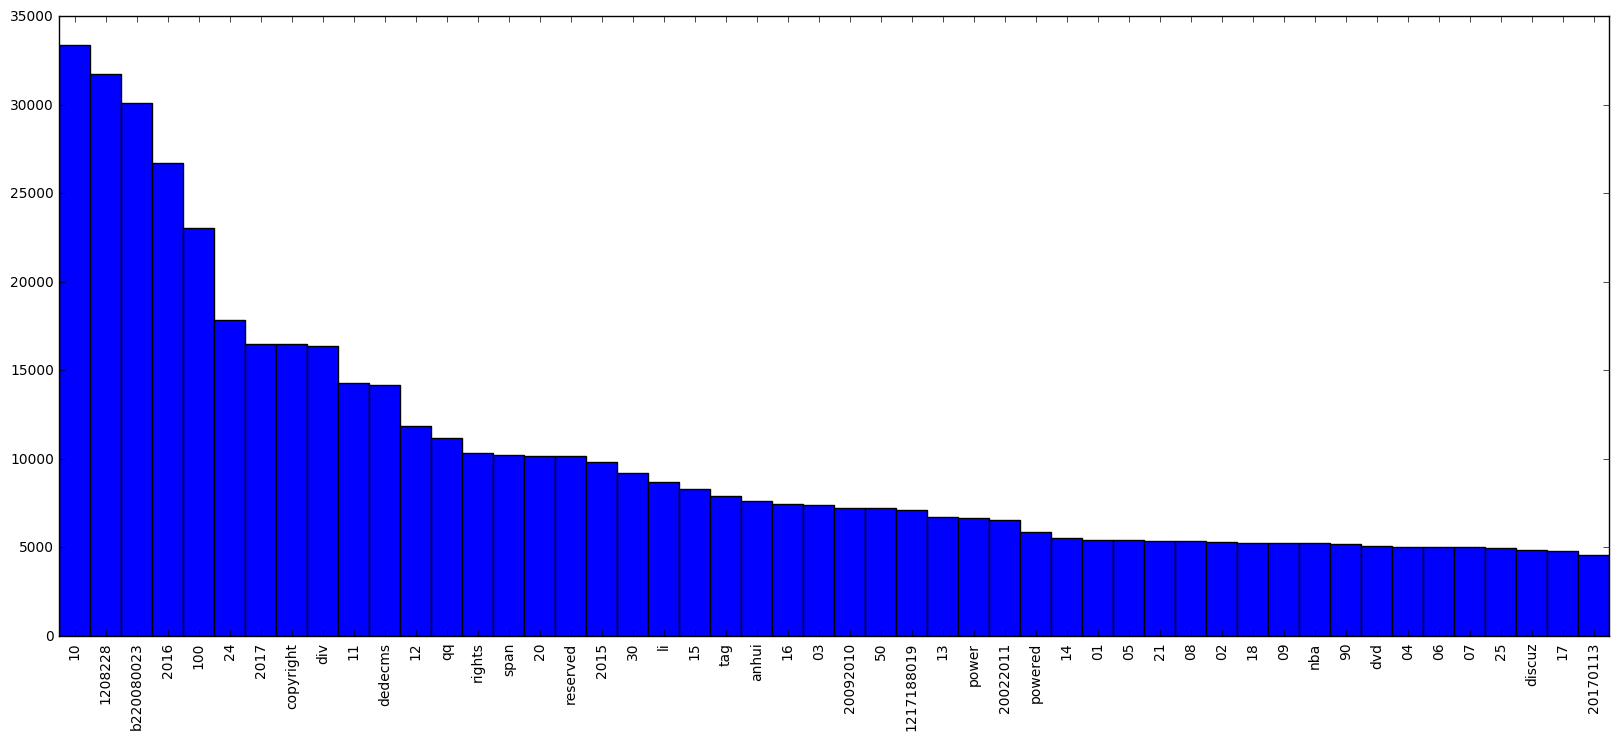

In [34]:
pos = np.arange(len(words))
width = 1.0     # gives histogram aspect to the bar diagram

plt.figure(figsize=(20,8))

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(words, rotation=90)

plt.bar(pos, counts, width, color='b')
plt.show()

In [35]:

#Create your bigrams
bgs = nltk.bigrams(flatten)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)

# for k,v in fdist.items():
#     print k,v

In [36]:
fds = fdist.most_common(50)
print fds

[((u'b220080023', u'1208228'), 28559), ((u'rights', u'reserved'), 10058), ((u'1208228', u'20092010'), 7199), ((u'20022011', u'dedecms'), 6572), ((u'copyright', u'20022011'), 6572), ((u'power', u'dedecms'), 6571), ((u'dedecms', u'power'), 6571), ((u'tag', u'copyright'), 6571), ((u'div', u'div'), 5554), ((u'10', u'b220080023'), 4410), ((u'powered', u'discuz'), 4179), ((u'1217188019', u'tag'), 4081), ((u'anhui', u'dvd'), 3848), ((u'occurred', u'processing'), 3832), ((u'processing', u'directive'), 3832), ((u'error', u'occurred'), 3832), ((u'alt', u'h2h2'), 3816), ((u'li', u'li'), 3784), ((u'2016', u'2016'), 3780), ((u'24', u'b220080023'), 3417), ((u'2016', u'24'), 3252), ((u'directive', u'error'), 2788), ((u'100', u'10'), 2777), ((u'100', u'1217188019'), 2765), ((u'10', u'11'), 2747), ((u'20161112', u'2016'), 2695), ((u'icp08007183', u'1208228'), 2568), ((u'2017', u'2017'), 2393), ((u'qq', u'qq'), 2384), ((u'reserved', u'b220080023'), 2321), ((u'010203040506', u'03'), 2252), ((u'h2h2', u'p

In [37]:
words, counts = zip(*fds)
words_zip = [' '.join(word) for word in words]

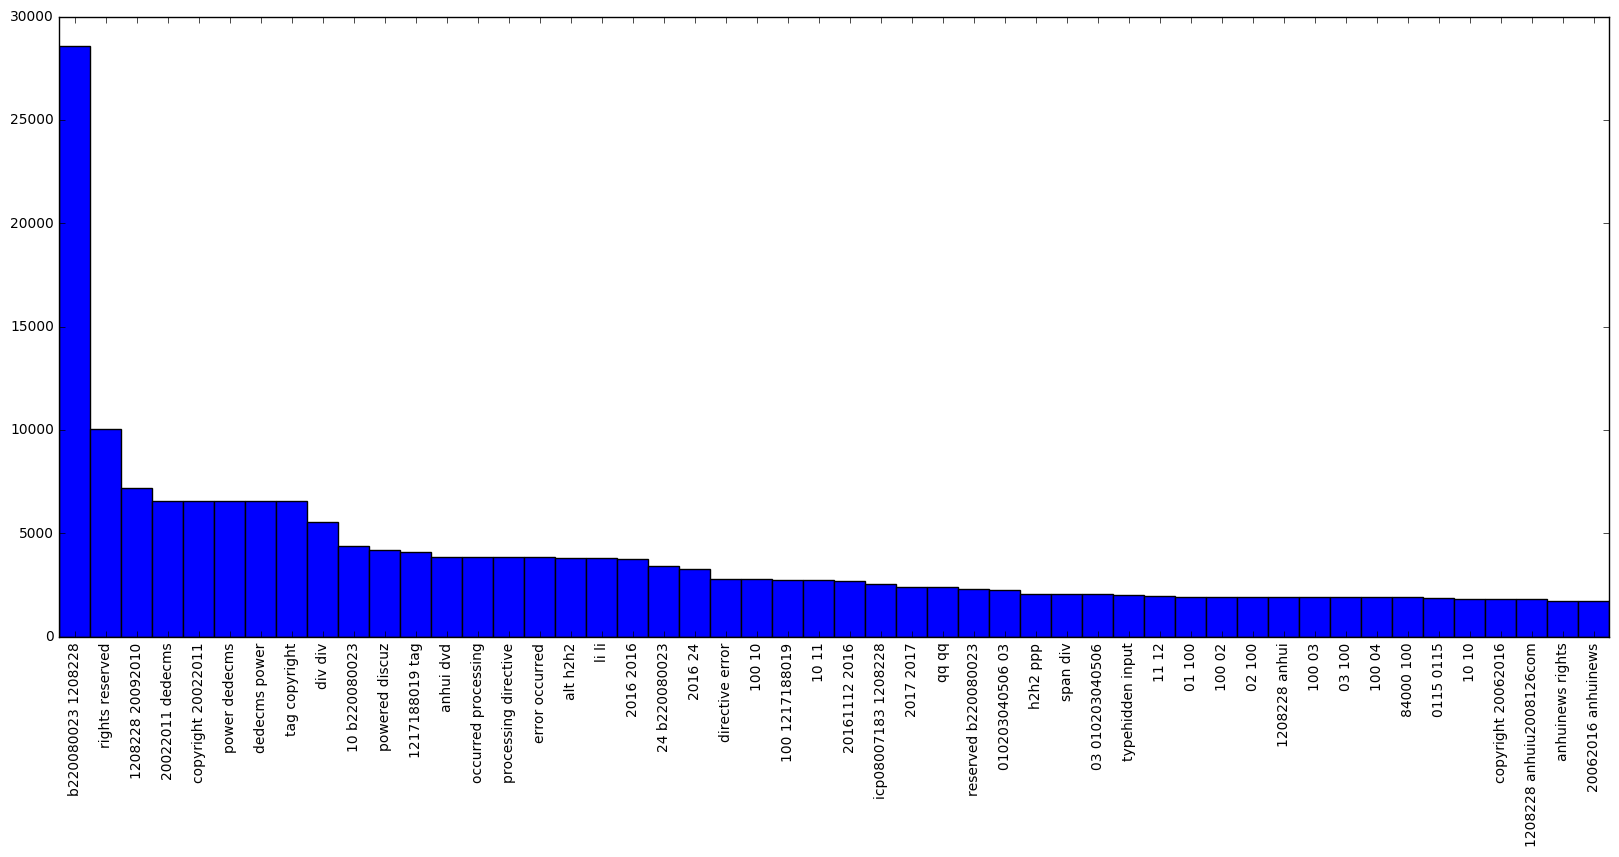

In [38]:
pos = np.arange(len(words_zip))
width = 1.0     # gives histogram aspect to the bar diagram

plt.figure(figsize=(20,8))

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(words_zip, rotation=90)

plt.bar(pos, counts, width, color='b')
plt.show()

In [39]:
#txt = '\xc2\xa0 this is a test'

In [40]:
#txt.decode('ascii', errors='ignore')

In [41]:
def tokenize_and_normalize(chunks):
#     print 'doc size', len(chunks)
    chunks_dec = chunks.decode('ascii', errors='ignore')
    words = [ tokenize.word_tokenize(sent) for sent in tokenize.sent_tokenize(chunks_dec) ]
    flatten = [ inner for sublist in words for inner in sublist ]
    stripped = [] 

    for word in flatten:         
        if word not in stopwords.words('english'):
            try:
                stripped.append(word.encode('latin-1').decode('utf8').lower())
            except:
                print "Cannot encode: " + word
                pass
    
    s = [ word for word in stripped if len(word) > 1 ] 
    
#     print 'word size', len(s)   
#     print s
    
    return s

In [42]:
#parsed = [ tokenize_and_normalize(s) for s in articles]

In [43]:
#my_pickle_dump('solr_parsed.pkl', parsed)

In [44]:
#tot_tokens = my_pickle_load('solr_tot_tokens.pkl')

In [45]:
dictionary = corpora.Dictionary(tot_tokens)


In [46]:
my_pickle_dump('solr_dictionary.pkl', dictionary)

In [47]:
corpus = [dictionary.doc2bow(text) for text in tot_tokens]

In [48]:
my_pickle_dump('solr_corpus.pkl', corpus)

In [49]:
#corpus1 = my_pickle_load('solr_corpus.pkl')

In [50]:
tfidf = models.TfidfModel(corpus)

In [52]:
corpus_tfidf = tfidf[corpus]

In [59]:
print type(corpus_tfidf)

<class 'gensim.interfaces.TransformedCorpus'>


In [54]:
corpus_np = np.array(corpus)

In [55]:
corpus_np.shape

(61809,)

In [57]:
corpus[12]

[(0, 6),
 (3, 1),
 (8, 1),
 (9, 1),
 (11, 2),
 (12, 1),
 (16, 1),
 (17, 1),
 (19, 3),
 (21, 1),
 (30, 1),
 (41, 1),
 (42, 1),
 (44, 1),
 (45, 1),
 (47, 2),
 (48, 6),
 (54, 1),
 (57, 1),
 (59, 1),
 (60, 2),
 (64, 1),
 (65, 1),
 (87, 1),
 (140, 1),
 (168, 2),
 (189, 2),
 (228, 2),
 (317, 1),
 (318, 1),
 (319, 1),
 (320, 1),
 (321, 1),
 (322, 1),
 (323, 1),
 (324, 3),
 (325, 1),
 (326, 3),
 (327, 1),
 (328, 1),
 (329, 5),
 (330, 1),
 (331, 1),
 (332, 1),
 (333, 2),
 (334, 1),
 (335, 1),
 (336, 1),
 (337, 1),
 (338, 1),
 (339, 2),
 (340, 1)]

In [58]:
my_pickle_dump('solr_corpus_tfidf.pkl', corpus_tfidf)

In [62]:
corpus_tfidf = my_pickle_load('solr_corpus_tfidf.pkl')


In [59]:
dictionary = my_pickle_load('solr_dictionary.pkl')

In [60]:
model = LsiModel(corpus_tfidf, id2word=dictionary, num_topics=300)

In [61]:
model.show_topic(10, topn=5)

[(u'directive', 0.47047995879164139),
 (u'occurred', 0.46924078497926441),
 (u'error', 0.4675630748359425),
 (u'processing', 0.46425408904026805),
 (u'cctv4', -0.20302559437613801)]

In [62]:
model.show_topics()

[(0,
  u'0.624*"dedecms" + 0.319*"1217188019" + 0.315*"20022011" + 0.313*"power" + 0.313*"tag" + 0.221*"100" + 0.219*"copyright" + 0.077*"2015" + 0.073*"10" + 0.057*"11"'),
 (1,
  u'0.346*"discuz" + 0.332*"qq" + 0.326*"powered" + 0.197*"icp09029325" + 0.197*"34100202000037" + 0.196*"qr" + 0.195*"comsenz" + 0.194*"x32" + 0.193*"20012013" + 0.186*"code"'),
 (2,
  u'-0.255*"03" + -0.247*"100" + -0.228*"01" + -0.227*"02" + -0.222*"04" + -0.221*"06" + -0.220*"2016" + -0.218*"07" + -0.212*"08" + -0.211*"05"'),
 (3,
  u'0.357*"2016" + 0.225*"2017" + -0.219*"100" + -0.206*"03" + -0.193*"01" + -0.193*"02" + -0.190*"04" + -0.189*"06" + -0.187*"07" + -0.178*"09"'),
 (4,
  u'-0.777*"div" + -0.496*"span" + -0.211*"input" + -0.176*"typehidden" + -0.071*"hrefjavascriptvoid0" + -0.035*"foreach" + -0.035*"typetext" + -0.035*"styledisplaynone" + -0.035*"classmsgfunc" + -0.035*"namevochannelid"'),
 (5,
  u'-0.355*"20072010" + -0.354*"icp070115451" + -0.354*"ahwhnet" + -0.350*"ahagenet" + -0.339*"qq785304

In [72]:
my_pickle_dump('solr_lsimodel.pkl', model)

In [49]:
lda=LdaModel(corpus_tfidf, id2word=dictionary, num_topics=15, update_every=0, passes=200)

In [50]:
my_pickle_dump('solr_lda.pkl', lda)

In [4]:
lda2 =my_pickle_load('solr_lda.pkl')

In [5]:
lda2.print_topics(15, 15)

[(0,
  u'0.001*dmu + 0.000*lindner + 0.000*genexprotools + 0.000*equilibrium + 0.000*buscar + 0.000*para + 0.000*de + 0.000*geoda + 0.000*montfort + 0.000*compartir + 0.000*correo + 0.000*gusta + 0.000*iniciar + 0.000*jquery + 0.000*adma'),
 (1,
  u'0.001*di + 0.001*orleans + 0.001*wppostimage + 0.001*nolacom + 0.000*classattachmentthumbnail + 0.000*timespicayune + 0.000*width150 + 0.000*classfield + 0.000*classfielditem + 0.000*classfielditemsdiv + 0.000*stylefloat + 0.000*5px + 0.000*img + 0.000*fieldlabelhiddendiv + 0.000*marginleft'),
 (2,
  u'0.003*data + 0.002*analytics + 0.002*big + 0.001*science + 0.001*2015 + 0.001*business + 0.001*management + 0.001*blog + 0.001*services + 0.001*news + 0.001*cloud + 0.001*information + 0.001*research + 0.001*2016 + 0.001*university'),
 (3,
  u'0.011*thinkers + 0.008*worlds + 0.005*best + 0.004*analytics + 0.004*social + 0.003*workforce + 0.003*data + 0.003*media + 0.002*cloud + 0.002*smartdata + 0.002*management + 0.002*followers + 0.002*coll

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [35]:

articles1 = articles[:2000]
titles1=titles[:2000]

In [36]:
queries = ['data science\n', 'machine learning\n', 'python\n', 'deep learning\n']

# DO TFIDF TRANSFORMATION
vectorizer = TfidfVectorizer(stop_words='english')

vectors = vectorizer.fit_transform(articles1).toarray()



In [37]:
my_pickle_dump('solr_vectorizer.pkl', vectorizer)
my_pickle_dump('solr_vectors.pkl', vectors)

In [38]:
def top_n(vectorizer, vectors, data, n):
    '''
    Print out the top 10 words by three different sorting mechanisms:
        * average tf-idf score
        * total tf-idf score
        * highest TF score across corpus
    '''
    words = vectorizer.get_feature_names()

    # Top 10 words by average tfidf
    # Take the average of each column, denoted by axis=0
    avg = np.sum(vectors, axis=0) / np.sum(vectors > 0, axis=0)
    print "top %d by average tf-idf" % n
    print get_top_values(avg, n, words)
    print

    # Top 10 words by total tfidf
    total = np.sum(vectors, axis=0)
    print "top %d by total tf-idf" % n
    print get_top_values(total, n, words)
    print

    # Top 10 words by TF
    vectorizer2 = TfidfVectorizer(use_idf=False)
    # make documents into one giant document for this purpose
    vectors2 = vectorizer2.fit_transform([" ".join(data)]).toarray()
    print "top %d by tf across all corpus" % n
    print get_top_values(vectors2[0], n, words)
    print

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values. Return
    the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    ''' 

#     print "get_top_values", len(lst), n, len(labels)
    
#     seqs =  np.argsort(lst)[-1:-n-1:-1] 
#     for k in seqs:
#         print k, labels[k]

#    print 'before return 0000', len(seqs)
        
    ret = [labels[i] for i in np.argsort(lst)[-1:-n-1:-1]]

#    print 'before return', len(ret)
#     return [labels[i] for i in np.argsort(lst)[-1:-n-1:-1]]
    return ret

def ranking(vectorizer, vectors, titles, queries, n):
    '''
    Print out the top n documents for each of the queries.
    '''
#    print queries
    
    tokenized_queries = vectorizer.transform(queries)
    cosine_similarities = linear_kernel(tokenized_queries, vectors)
    
#    print 'cosine', cosine_similarities
    
    for i, query in enumerate(queries):
        print query
        ret = get_top_values(cosine_similarities[i], 3, titles)
        
        #print "ret len ---", len(ret)
        
        for k in xrange(n):
            print k, ret[k]
#        print get_top_values(cosine_similarities[i], 3, titles)
        print




In [39]:

# FEATURE IMPORTANCES
top_n(vectorizer, vectors, articles1, 10)

# RANKING
#ranking(vectorizer, vectors, pure_docs, get_queries('queries.txt'), 3)
ranking(vectorizer, vectors, titles, queries, 3)


top 10 by average tf-idf
[u'idiro', u'knewton', u'manta', u'cronkite', u'xs', u'iioa', u'zocdoc', u'niara', u'keylines', u'param']

top 10 by total tf-idf
[u'data', u'business', u'2015', u'analytics', u'big', u'management', u'bi', u'new', u'london', u'2014']

top 10 by tf across all corpus
[u'ti', u'andreessen', u'toying', u'oncologists', u'incumbents', u'datainnovation', u'formidables', u'itrem', u'thurrock', u'oprah']

data science

0 Revolutions: profiles
1 Revolutions: random
2 Difference between data engineers and data scientists - Data Science Central

machine learning

0 SIGKDD Innovation Award | Sig KDD
1 Zeller-Michael | Sig KDD
2 SIGKDD Curriculum Committee | Sig KDD

python

0 Ed Ramsden on his winning solution in SIAM SDM’11 Contest | TunedIT Data Mining Blog
1 Revolutions: user groups
2 Enterprise Solutions

deep learning

0 Privacy Policy | Adweek
1 Events | AlchemyAPI
2 nan



In [32]:
print type(vectors)

<type 'numpy.ndarray'>


In [33]:
print type(vectorizer)

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [60]:
vectors.shape

(2000, 63392)

In [61]:
vectors[0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])